### Data Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Label-encoding function where you can input the order
def labeller(labels, df):
    for key in labels:
        if key in df.columns:
            df[key] = df[key].apply(lambda x: labels[key].index(x)) 
        else:
            continue

In [3]:
# Cleaning the 2014 dataset
osmi_2014 = pd.read_csv("C:\\Users\\joyce\\OSMI\\OSMI2014.csv")
# Drop entries for those who are self-employed
osmi_2014 = osmi_2014[osmi_2014.self_employed == "No"]
# Drop self-employed column
osmi_2014 = osmi_2014.drop(['self_employed'], axis=1)
# Drop free-form comments
osmi_2014 = osmi_2014.drop(['comments'], axis=1)
# Replace Nan with N/A
osmi_2014['state'] = osmi_2014['state'].replace(np.nan, "N/A")
osmi_2014['work_interfere'] = osmi_2014['work_interfere'].replace(np.nan, "Not applicable to me")
# Create age_range which is categorical variable from age
osmi_2014['age_range'] = pd.cut(osmi_2014['age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)
# Correct incorrect formatting from csv
osmi_2014["no_employees"]=osmi_2014["no_employees"].replace({"5-Jan": "1-5", "25-Jun":"6-25"})
# Make country name consistent with other datasets
osmi_2014["country"]=osmi_2014["country"].replace({"United States": "United States of America"})
# Label encode tech_company
osmi_2014["tech_company"]=osmi_2014["tech_company"].replace({"No": 1, "Yes": 0})
# Create new variable called country_label: 1 if USA, 0 if non-USA
country_label = []
for coun in osmi_2014["country"]:
    if (coun == "United States of America"):
        country_label.append("USA")
    else:
        country_label.append("Non-USA")
osmi_2014["country_label"] = country_label
# Convert gender into a categorical variable by compiling freeform responses
osmi_2014["gender"] = osmi_2014["gender"].str.lower()
osmi_2014["gender"]=osmi_2014["gender"].replace({"female": "F", "female ": "F",
                                                "f":"F", "femake":"F", "woman":"F",
                                                "female/woman":"F", "female (cis)":"F", "femail":"F", " female": "F"})
osmi_2014["gender"]=osmi_2014["gender"].replace({"male": "M", "male ": "M", "m":"M", "man":"M", "cis male":"M", 
                                                 "male (cis)":"M", "mail":"M", "cis man":"M", "msle":"M", "maile":"M", "malr":"M", "make":"M"})
osmi_2014["gender"]=osmi_2014["gender"].replace({"male-ish": "Other", "non-binary": "Other",
                                                 "neuter":"Other", "androgynous":"Other", 
                                                  "fluid":"Other", "enby":"Other",
                                                "trans-female":"Other", "agender":"Other", "female (trans)":"Other",
                                                 "male/genderqueer":"Other", "nonbinary":"Other",
                                                "androgyne":"Other", 
                                                 "ostensibly male, unsure what that really means":"Other",
                                                "nb masculine":"Other", "genderqueer":"Other", 
                                                 "trans woman":"Other", "queer/she/they":"Other", 
                                                "other/transfeminine":"Other", "male leaning androgynous":"Other", 
                                                "something kinda male?":"Other", "guy (-ish) ^_^":"Other"})
osmi_2014.gender.unique()
# Used same labelling as other datasets so numbers would match up, even though field were not included
# Create label encoding dictionary so I can specify order of labels for 2014 dataset
labs_2014 = {}
labs_2014["leave"] = ["Don't know", 'Very difficult','Somewhat difficult','Neither easy nor difficult', 'Somewhat easy', 'Very easy'] # diff
labs_2014["no_employees"]= ['1-5', '6-25','26-100','100-500','500-1000', 'More than 1000'] 
labs_2014["treatment"] = ["No", "Yes"]
labs_2014["obs_consequence"] = ["No", "Yes"]
labs_2014["age_range"] = ["0-20", "21-30", "31-65", "66-100"]
labs_2014["gender"] = ["M", "F", "Other"]
labs_2014["benefits"] = ["Don't know","Not eligible for coverage", "No", "Yes"] # diff 
labs_2014["family_history"] = ["I don't know", "No", "Yes"] # diff
labs_2014["care_options"] = ["N/A", "Not sure", "No", "Yes"] # diff
labs_2014["wellness_program"] = ["Don't know", "No", "Yes"]
labs_2014["seek_help"] = ["Don't know", "No", "Yes"]
labs_2014["anonymity"] = ["Don't know", "No", "Yes"]
labs_2014["coworkers"] = ["No", "Some of them", "Yes"]
labs_2014["supervisor"] = ["No", "Some of them", "Yes"]
labs_2014["mental_vs_physical"] = ["Don't know", "No", "Yes"]                          
labs_2014["work_interfere"] = ["Not applicable to me", "Never", "Rarely", "Sometimes", "Often"]
labs_2014["mental_health_interview"] = ["No", "Maybe", "Yes"]
labs_2014["phys_health_interview"] = ["No", "Maybe", "Yes"]
labs_2014["mental_health_consequence"] = ["No", "Maybe", "Yes"]
labs_2014["phys_health_consequence"] = ["No", "Maybe", "Yes"]  
labs_2014["remote_work"] = ["No", "Yes"]
labs_2014["country_label"] = ["Non-USA", "USA"]
# Label-encode all variables
labeller(labs_2014, osmi_2014)
# Make sure age_range is of type int
osmi_2014["age_range"] = osmi_2014["age_range"].astype(int)
# Convert dataframe into csv
osmi_2014.to_csv(r'C:\Users\joyce\OSMI\modified_2014_cleaned.csv', index=False)
osmi_2014

year  age  gender                   country state  family_history  \
20    2014   29       0  United States of America    NY               2   
22    2014   46       0  United States of America    MA               1   
23    2014   41       0  United States of America    IA               1   
24    2014   33       0  United States of America    CA               2   
25    2014   35       0  United States of America    TN               2   
26    2014   33       0  United States of America    TN               1   
27    2014   35       1  United States of America    CA               2   
28    2014   34       0  United States of America    OH               1   
29    2014   37       0            United Kingdom   N/A               1   
30    2014   32       0            United Kingdom   N/A               1   
32    2014   30       0            United Kingdom   N/A               2   
33    2014   42       0  United States of America    WA               2   
34    2014   40       1  United States of America    WI               1   
35    2014   27       0  United States of America    NY               1   
36    2014   29       0                    Canada   N/A               1   
37    2014   38       0                  Portugal   N/A               1   
38    2014   50       0  United States of America    IN               1   
39    2014   35       0  United States of America    TX               1   
40    2014   24       0            United Kingdom   N/A               1   
41    2014   35       0  United States of America    MI               1   
42    2014   27       0                    Canada   N/A               2   
43    2014   18       0               Netherlands   N/A               1   
44    2014   30       0  United States of America    IN               1   
45    2014   38       1  United States of America    TX               2   
46    2014   28       0            United Kingdom   N/A               1   
47    2014   34       0  United States of America    TN               1   
49    2014   30       0  United States of America    IL               2   
50    2014   22       0  United States of America    TX               2   
51    2014   33       0  United States of America    UT               1   
52    2014   31       0  United States of America   N/A               1   
...    ...  ...     ...                       ...   ...             ...   
1224  2014   39       0               Netherlands   N/A               1   
1225  2014   32       1                   Ireland   N/A               2   
1226  2014   25       0  United States of America    MN               2   
1227  2014   39       0                    Greece   N/A               1   
1228  2014   23       1            United Kingdom   N/A               2   
1230  2014   25       0            United Kingdom   N/A               2   
1231  2014   23       0            United Kingdom   N/A               1   
1232  2014   24       2            United Kingdom   N/A               1   
1233  2014   23       0                    Canada   N/A               1   
1234  2014   60       0  United States of America    CA               1   
1235  2014   28       0                   Ireland   N/A               1   
1236  2014   28       0  United States of America    TN               2   
1237  2014   30       0               Netherlands   N/A               1   
1238  2014   31       0                   Germany   N/A               2   
1240  2014   28       0                   Ireland   N/A               1   
1241  2014   43       1  United States of America    FL               2   
1242  2014   32       1            United Kingdom   N/A               1   
1243  2014   22       0                 Australia   N/A               2   
1244  2014   32       0  United States of America    OR               1   
1245  2014   36       0                   Finland   N/A               1   
1246  2014   41       1  United States of America    WA               2   
1247  2014   30       0  United

In [4]:
# Cleaning the 2016 dataset
osmi_2016 = pd.read_csv("C:\\Users\\joyce\\OSMI\\OSMI2016.csv")
osmi_2016
# Get important variables from dataset
osmi_2016 = osmi_2016[["year", "age", "gender", "no_employees", "country", "state", "self_employed","family_history", 
                      "tech_company",  "benefits", "care_options", "wellness_program", "seek_help", "anonymity", "leave", 
                       "coworkers", "supervisor", "work_interfere_effective", "work_interfere_ineffective", "mental_health_interview",
                       "phys_health_interview", "remote_work", "current_mental_disorder", "treatment", "diagnosed"]]
# Drop entries for those who are self-employed
osmi_2016 = osmi_2016[osmi_2016.self_employed == 0]
# Drop self-employed column
osmi_2016 = osmi_2016.drop(['self_employed'], axis=1)

# Convert gender into a categorical variable by compiling freeform responses
osmi_2016["gender"] = osmi_2016["gender"].str.lower()
osmi_2016["gender"]=osmi_2016["gender"].replace({"female": "F", "female ": "F", "i identify as female.":"F", 
                                                "f":"F", "fm":"F", "cisF":"F", "female assigned at birth ":"F", "woman":"F",
                                                "female/woman":"F", "cisgender female":"F", "fem":"F", 
                                                "female (props for making this a freeform field, though)":"F", " female": "F",
                                                "cis-woman":"F", "cis female ":"F" })
osmi_2016["gender"]=osmi_2016["gender"].replace({"male": "M", "male ": "M", "m":"M", "man":"M", "cis male":"M", 
                                                 "male (cis)":"M", "sex is male":"M", "dude":"M",
                                                "mail":"M", "cis man":"M", "male.":"M", "cisdude":"M"})
osmi_2016["gender"]=osmi_2016["gender"].replace({"bigender": "Other", "non-binary": "Other", 
                                                 "genderfluid (born female)":"Other", 
                                                 "female or multi-gender femme":"Other", "androgynous":"Other", 
                                                 "male 9:1 female, roughly":"Other", "genderfluid":"Other", 
                                                 "enby":"Other",
                                                "genderqueer woman":"Other", "agender":"Other", "queer":"Other",
                                                 "male/genderqueer":"Other", "nonbinary":"Other",
                                                "genderflux demi-girl":"Other", 
                                                 "female-bodied; no feelings about gender":"Other",
                                                "nb masculine":"Other", "genderqueer":"Other", 
                                                 "transgender woman":"Other", "male (trans, ftm)":"Other", 
                                                "other/transfeminine":"Other", "transitioned, m2f":"Other", 
                                                "human":"Other", "none of your business":"Other", "other":"Other"})
osmi_2016.gender.unique()
# Create age_range which is categorical variable from age
osmi_2016['age_range'] = pd.cut(osmi_2016['age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)
# Correct incorrect formatting from csv
osmi_2016["no_employees"]=osmi_2016["no_employees"].replace({"5-Jan": "1-5", "25-Jun":"6-25"})
# Make sure tech_company is of type int
osmi_2016["tech_company"] = osmi_2016["tech_company"].astype(int)
# Replace Nan with N/A
osmi_2016['state'] = osmi_2016['state'].replace(np.nan, "N/A")
osmi_2016['care_options'] = osmi_2016['care_options'].replace(np.nan, "N/A")
osmi_2016['benefits'] = osmi_2016['benefits'].replace("Not eligible for coverage / N/A", "Not eligible for coverage")
# Drop remaining Nan
osmi_2016 = osmi_2016.dropna(axis = 0)
osmi_2016.isna().sum()
# Create new variable called country_label: 1 if USA, 0 if non-USA
country_label = []
for coun in osmi_2016["country"]:
    if (coun == "United States of America"):
        country_label.append("USA")
    else:
        country_label.append("Non-USA")
osmi_2016["country_label"] = country_label
# Create label encoding dictionary so I can specify order of labels for 2016-2019 datasets
dict_labs = {}
dict_labs["leave"] = ["I don't know", 'Very difficult','Somewhat difficult','Neither easy nor difficult', 'Somewhat easy', 'Very easy']
dict_labs["no_employees"]= ['1-5', '6-25','26-100','100-500','500-1000', 'More than 1000']
dict_labs["diagnosed"] = ["No", "Yes"]
dict_labs["age_range"] = ["0-20", "21-30", "31-65", "66-100"]
dict_labs["gender"] = ["M", "F", "Other"]
dict_labs["benefits"] = ["I don't know", "Not eligible for coverage", "No", "Yes"]
dict_labs["family_history"] = ["I don't know", "No", "Yes"]
dict_labs["care_options"] = ["N/A", "I am not sure", "No", "Yes"]
dict_labs["wellness_program"] = ["I don't know", "No", "Yes"]
dict_labs["seek_help"] = ["I don't know", "No", "Yes"]
dict_labs["anonymity"] = ["I don't know", "No", "Yes"]
dict_labs["coworkers"] = ["No", "Maybe", "Yes"]
dict_labs["supervisor"] = ["No", "Maybe", "Yes"]
dict_labs["work_interfere_effective"] = ["Not applicable to me", "Never", "Rarely", "Sometimes", "Often"]
dict_labs["work_interfere_ineffective"] = ["Not applicable to me", "Never", "Rarely", "Sometimes", "Often"]
dict_labs["mental_health_interview"] = ["No", "Maybe", "Yes"]
dict_labs["phys_health_interview"] = ["No", "Maybe", "Yes"]
dict_labs["remote_work"] = ["Never", "Sometimes", "Always"]
dict_labs["current_mental_disorder"] = ["No", "Maybe", "Yes"]
dict_labs["country_label"] = ["Non-USA", "USA"]
# Label-encode all variables  
labeller(dict_labs, osmi_2016)
# Make sure age_range is of type int
osmi_2016["age_range"] = osmi_2016["age_range"].astype(int)
# Convert dataframe into csv
osmi_2016.to_csv(r'C:\Users\joyce\OSMI\modified_2016_cleaned.csv', index=False)
osmi_2016



year  age  gender  no_employees                   country  \
0     2016   39       0             2            United Kingdom   
1     2016   29       0             1  United States of America   
2     2016   38       0             1            United Kingdom   
4     2016   43       1             1  United States of America   
5     2016   42       0             5            United Kingdom   
6     2016   30       0             2  United States of America   
7     2016   37       1             5  United States of America   
8     2016   44       1             2  United States of America   
10    2016   28       0             2  United States of America   
11    2016   34       0             3  United States of America   
12    2016   30       1             3  United States of America   
13    2016   44       0             3                    Canada   
14    2016   35       0             3  United States of America   
15    2016   52       0             3  United States of America   
16    2016   32       1             2                    Canada   
17    2016   34       0             4            United Kingdom   
19    2016   31       0             3  United States of America   
20    2016   26       0             1  United States of America   
21    2016   35       0             5  United States of America   
22    2016   25       0             2                   Germany   
23    2016   33       0             0                    Canada   
25    2016   42       0             3                   Germany   
26    2016   27       0             2               Netherlands   
27    2016   35       0             3                   Germany   
28    2016   34       1             4            United Kingdom   
29    2016   32       2             1            United Kingdom   
30    2016   32       2             3                   Germany   
31    2016   30       0             3  United States of America   
32    2016   31       0             5  United States of America   
34    2016   36       0             2            United Kingdom   
...    ...  ...     ...           ...                       ...   
1398  2016   30       0             5  United States of America   
1399  2016   28       0             3  United States of America   
1400  2016   28       1             1  United States of America   
1401  2016   37       0             5  United States of America   
1402  2016   30       0             2  United States of America   
1403  2016   27       0             1                     India   
1405  2016   28       0             5                    Poland   
1406  2016   26       2             1                   Ireland   
1407  2016   29       0             3  United States of America   
1409  2016   36       0             3            United Kingdom   
1410  2016   38       0             2                   Belgium   
1411  2016   22       1             1  United States of America   
1412  2016   24       0             0  United States of America   
1413  2016   24       1             3  United States of America   
1414  2016   36       1             4  United States of America   
1415  2016   24       1             5  United States of America   
1416  2016   24       0             4  United States of America   
1417  2016   31       0             2               Netherlands   
1418  2016   39       0             2            United Kingdom   
1419  2016   41       0             5  United States of America   
1421  2016   37       0             2                   Estonia   
1422  2016   30       0             2  United States of America   
1423  2016   24       0             3                    Canada   
1424  2016   22       1             3                    Canada   
1425  2016   24       0             3                    Canada   
1426  2016   26       1             3                    Canada   
1427  2016   38       1             4  United States of America   
1430  2016   52       0             3  United States 

In [5]:
# Cleaning the 2017 dataset
osmi_2017 = pd.read_csv("C:\\Users\\joyce\\OSMI\\OSMI2017.csv")
# Get important variables from dataset
osmi_2017 = osmi_2017[["year", "age", "gender", "no_employees", "country", "state", "self_employed","family_history", 
                      "tech_company",  "benefits", "care_options", "wellness_program", "seek_help", "anonymity", "leave", 
                       "importance_mental", "importance_physical", "coworkers", "supervisor", "work_interfere_effective", 
                       "work_interfere_ineffective", "mental_health_interview","phys_health_interview", 
                       "id_mental_health_issue", "current_mental_disorder", "treatment", "diagnosed", 
                       "overall_support_rating"]]
# Drop entries for those who are self-employed
osmi_2017 = osmi_2017[osmi_2017.self_employed == 0]
# Drop self-employed column
osmi_2017 = osmi_2017.drop(['self_employed'], axis=1)
# Create age_range which is categorical variable from age
osmi_2017['age_range'] = pd.cut(osmi_2017['age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)
# Correct incorrect formatting from csv
osmi_2017["no_employees"]=osmi_2017["no_employees"].replace({"5-Jan": "1-5", "25-Jun":"6-25"})
# Make sure vars are of type int
osmi_2017["tech_company"] = osmi_2017["tech_company"].astype(int)
osmi_2017["age"] = osmi_2017["age"].astype(int)
osmi_2017["id_mental_health_issue"] = osmi_2017["id_mental_health_issue"].astype(int)
osmi_2017["overall_support_rating"] = osmi_2017["overall_support_rating"].astype(int)
# Replace Nan with N/A
osmi_2017['state'] = osmi_2017['state'].replace(np.nan, "N/A")
osmi_2017["gender"] = osmi_2017["gender"].replace(np.nan, "Other")
osmi_2017['care_options'] = osmi_2017['care_options'].replace(np.nan, "N/A")
osmi_2017['benefits'] = osmi_2017['benefits'].replace("Not eligible for coverage / NA", "Not eligible for coverage")
# If empty cell, assumed response was "No" for diagnosed
osmi_2017['diagnosed'] = osmi_2017['diagnosed'].replace(np.nan, "No")
# Equate "Possibly" and "Maybe" for current_mental_disorder and "Difficult" and "Very Difficult"
osmi_2017['current_mental_disorder'] = osmi_2017['current_mental_disorder'].replace("Possibly", "Maybe")
osmi_2017['leave'] = osmi_2017['leave'].replace("Difficult", "Very difficult")
# Create new variable called country_label: 1 if USA, 0 if non-USA
country_label = []
for coun in osmi_2017["country"]:
    if (coun == "United States of America"):
        country_label.append("USA")
    else:
        country_label.append("Non-USA")
osmi_2017["country_label"] = country_label

# Drop "Don't Know" responses to current_mental_disorder
idx_names = osmi_2017[osmi_2017['current_mental_disorder'] == "Don't Know"].index 
osmi_2017.drop(idx_names, inplace = True) 
# Convert gender into a categorical variable by compiling freeform responses
osmi_2017["gender"] = osmi_2017["gender"].str.lower()
osmi_2017["gender"]=osmi_2017["gender"].replace({"female": "F", "female ": "F", 
                                                "f":"F", "my sex is female.":"F", "woman":"F",
                                                "female/woman":"F", "cisgender female":"F", "f, cisgender":"F", 
                                                "female (cis) ":"F", "female (cisgender)": "F",
                                                "cis-female":"F", "cis female":"F", "femalw":"F", "femail":"F",
                                                "female (cis)":"F"})
osmi_2017["gender"]=osmi_2017["gender"].replace({"male": "M", "male ": "M", "m":"M", "man":"M", "cis male":"M", 
                                                 "male (cis)":"M", "sex is male":"M", "dude":"M",
                                                "mail":"M", "cis male ":"M", "male-ish":"M", "cis-male":"M",
                                                "cis hetero male":"M"})
osmi_2017["gender"]=osmi_2017["gender"].replace({"non-binary": "Other", 
                                                "agender/genderfluid":"Other", 
                                                "uhhhhhhhhh fem genderqueer?":"Other",
                                                 "genderqueer/non-binary":"Other", "non binary":"Other",
                                                "genderqueer demigirl":"Other", "genderfluid":"Other",
                                                 "genderqueer":"Other", "nonbinary":"Other",
                                                 "transgender woman":"Other", "none":"Other", 
                                                "transfeminine":"Other","sometimes":"Other", "contextual":"Other", "other":"Other",
                                                "\-":"Other", "god king of the valajar":"Other"})

osmi_2017.gender.unique()
# Label-encode all variables
labeller(dict_labs, osmi_2017)
# Make sure age_range is of type int
osmi_2017["age_range"] = osmi_2017["age_range"].astype(int)
# Convert dataframe into csv
osmi_2017.to_csv(r'C:\Users\joyce\OSMI\modified_2017_cleaned.csv', index=False)
osmi_2017

year  age  gender  no_employees                   country  \
0    2017   27       1             3            United Kingdom   
1    2017   31       0             3            United Kingdom   
2    2017   36       0             1  United States of America   
3    2017   22       0             5  United States of America   
5    2017   30       0             3  United States of America   
6    2017   36       1             1  United States of America   
7    2017   38       1             2  United States of America   
10   2017   40       0             3  United States of America   
11   2017   35       0             3  United States of America   
12   2017   23       0             5                    Russia   
13   2017   22       1             5  United States of America   
14   2017   34       1             2  United States of America   
15   2017   28       0             3  United States of America   
16   2017   38       0             2                Bangladesh   
18   2017   21       0             1                   Germany   
20   2017   22       0             1            United Kingdom   
21   2017   18       0             3            United Kingdom   
22   2017   37       1             2  United States of America   
23   2017   25       0             0            United Kingdom   
26   2017   66       1             5  United States of America   
27   2017   31       1             3  United States of America   
28   2017   32       0             3                    Canada   
30   2017   30       1             3  United States of America   
31   2017   31       0             3  United States of America   
32   2017   46       0             3                   Iceland   
34   2017   28       1             5  United States of America   
35   2017   34       1             1                     Japan   
36   2017   25       0             2  United States of America   
37   2017   35       0             3  United States of America   
39   2017   40       0             3  United States of America   
..    ...  ...     ...           ...                       ...   
717  2017   22       1             1  United States of America   
718  2017   27       1             2  United States of America   
720  2017   33       1             1  United States of America   
721  2017   28       0             2  United States of America   
722  2017   36       0             2  United States of America   
723  2017   25       1             1  United States of America   
725  2017   39       0             5  United States of America   
726  2017   31       2             3  United States of America   
728  2017   43       0             3  United States of America   
730  2017   31       1             3  United States of America   
731  2017   28       0             2                     India   
732  2017   27       0             0  United States of America   
733  2017   28       0             0  United States of America   
734  2017   43       1             4  United States of America   
735  2017   31       1             5  United States of America   
736  2017   37       0             5  United States of America   
737  2017   36       0             2  United States of America   
738  2017   42       1             3  United States of America   
739  2017   29       1             3  United States of America   
740  2017   41       1             4  United States of America   
742  2017   53       0             2  United States of America   
745  2017   37       1             3  United States of America   
746  2017   57       1             2  United States of America   
747  2017   47       0             5  United States of America   
748  2017   34       0             3  United States of America   
749  2017   29       0             2  United States of America   
750  2017   38       0             4  United States of America   
751  2017   41       0             2            United Kingdom   
752  2017   40       0             1  United 

In [6]:
# Cleaning the 2018 dataset
osmi_2018 = pd.read_csv("C:\\Users\\joyce\\OSMI\\OSMI2018.csv")
# Get important variables from dataset
osmi_2018 = osmi_2018[["year", "age", "gender", "no_employees", "country", "state", "self_employed","family_history", 
                      "tech_company",  "benefits", "care_options", "wellness_program", "seek_help", "anonymity", "leave", 
                       "importance_mental", "importance_physical", "coworkers", "supervisor", "work_interfere_effective", 
                       "work_interfere_ineffective", "mental_health_interview","phys_health_interview", 
                       "id_mental_health_issue", "current_mental_disorder", "treatment", "diagnosed", 
                       "overall_support_rating"]]
# Drop entries for those who are self-employed
osmi_2018 = osmi_2018[osmi_2018.self_employed == 0]
# Drop self-employed column
osmi_2018 = osmi_2018.drop(['self_employed'], axis=1)
# Create age_range which is categorical variable from age
osmi_2018['age_range'] = pd.cut(osmi_2018['age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)
# Correct incorrect formatting from csv
osmi_2018["no_employees"]=osmi_2018["no_employees"].replace({"5-Jan": "1-5", "25-Jun":"6-25"})
# Make sure tech_company is of type int
osmi_2018["tech_company"] = osmi_2018["tech_company"].astype(int)
# Replace Nan with N/A
osmi_2018['state'] = osmi_2018['state'].replace(np.nan, "N/A")
osmi_2018["gender"] = osmi_2018["gender"].replace(np.nan, "Other")
osmi_2018['care_options'] = osmi_2018['care_options'].replace(np.nan, "N/A")
osmi_2018['benefits'] = osmi_2018['benefits'].replace("Not eligible for coverage / NA", "Not eligible for coverage")
# If empty cell, assumed response was "No" for diagnosed
osmi_2018['diagnosed'] = osmi_2018['diagnosed'].replace(np.nan, "No")
# Equate "Possibly" and "Maybe" for current_mental_disorder and "Difficult" and "Very Difficult"
osmi_2018['current_mental_disorder'] = osmi_2018['current_mental_disorder'].replace("Possibly", "Maybe")
osmi_2018['leave'] = osmi_2018['leave'].replace("Difficult", "Very difficult")
# Drop "Don't Know" responses to current_mental_disorder
idx_names = osmi_2018[osmi_2018['current_mental_disorder'] == "Don't Know"].index 
osmi_2018.drop(idx_names, inplace = True) 
# Create new variable called country_label: 1 if USA, 0 if non-USA
country_label = []
for coun in osmi_2018["country"]:
    if (coun == "United States of America"):
        country_label.append("USA")
    else:
        country_label.append("Non-USA")
osmi_2018["country_label"] = country_label
# Convert gender into a categorical variable by compiling freeform responses
osmi_2018["gender"] = osmi_2018["gender"].str.lower()
osmi_2018["gender"]=osmi_2018["gender"].replace({"female": "F", "female ": "F", 
                                                "f":"F", "i identify as female":"F", "woman":"F",
                                                "female/woman":"F", "cisgender female":"F", "f, cisgender":"F", 
                                                "cisgendered woman":"F", "female (cisgender)": "F",
                                                "cis-female":"F", "cis female":"F", "*shrug emoji* (f)":"F",
                                                "cis woman":"F", "cis female ":"F"})
osmi_2018["gender"]=osmi_2018["gender"].replace({"male": "M", "male ": "M", "m":"M", "man":"M", "cis male":"M", 
                                                 "male (cis)":"M", "ostensibly male":"M", "dude":"M",
                                                "mail":"M", "cis-male":"M", "male-ish":"M", "cisgender male":"M",
                                                 "swm":"M", "male, born with xy chromosoms":"M"})
osmi_2018["gender"]=osmi_2018["gender"].replace({"non-binary": "Other", 
                                                "female/gender non-binary":"Other", 
                                                "trans man":"Other",
                                                 "she/her/they/them":"Other", "non binary":"Other",
                                                "genderfluid":"Other",
                                                 "genderqueer":"Other", "nonbinary":"Other", "trans woman":"Other",
                                                 "transgender":"Other", "none":"Other", "agender":"Other",
                                                "trans female":"Other","female/gender non-binary.":"Other", "nb":"Other", "other":"Other",
                                                "nonbinary/femme":"Other", "gender non-conforming woman":"Other"})

osmi_2018.gender.unique()
# Label-encode all variables
labeller(dict_labs, osmi_2018)
# Make sure age_range is of type int
osmi_2018["age_range"] = osmi_2018["age_range"].astype(int)
# Convert dataframe into csv
osmi_2018.to_csv(r'C:\Users\joyce\OSMI\modified_2018_cleaned.csv', index=False)
osmi_2018


year  age  gender  no_employees                   country  \
0    2018   57       1             5                    Canada   
1    2018   29       0             5  United States of America   
2    2018   46       0             1  United States of America   
3    2018   34       0             1                    Norway   
4    2018   29       0             2  United States of America   
5    2018   55       0             3  United States of America   
6    2018   29       2             5                   Finland   
7    2018   35       0             2                    Poland   
8    2018   33       0             5                    Russia   
10   2018   45       0             5  United States of America   
11   2018   31       0             4                   Germany   
13   2018   26       0             5                   Germany   
14   2018   27       1             3                    Serbia   
15   2018   35       0             1                    Canada   
16   2018   47       0             2  United States of America   
17   2018   37       0             5  United States of America   
20   2018   37       0             2  United States of America   
21   2018   36       0             3  United States of America   
23   2018   45       0             3  United States of America   
24   2018   30       0             1  United States of America   
25   2018   46       0             1                   Germany   
26   2018   29       0             2                     India   
27   2018   26       0             5                   Ukraine   
29   2018   44       0             1                    Canada   
30   2018   32       0             2  United States of America   
32   2018   19       0             4                 Australia   
33   2018   38       0             5            United Kingdom   
34   2018   61       0             1  United States of America   
35   2018   44       0             1  United States of America   
37   2018   31       0             3                   Ireland   
..    ...  ...     ...           ...                       ...   
379  2018   34       2             5  United States of America   
380  2018   55       1             3  United States of America   
382  2018   41       1             5  United States of America   
383  2018   24       1             5  United States of America   
384  2018   27       1             3  United States of America   
386  2018   37       0             3  United States of America   
387  2018   61       0             1  United States of America   
389  2018   29       0             5  United States of America   
390  2018   41       0             3  United States of America   
391  2018   39       0             2                     Spain   
392  2018   30       0             4  United States of America   
393  2018   46       0             5                     Italy   
395  2018   29       1             5  United States of America   
396  2018   34       1             5                 Australia   
398  2018   36       0             3  United States of America   
399  2018   34       0             2            United Kingdom   
402  2018   35       0             2  United States of America   
403  2018   34       0             3  United States of America   
404  2018   24       2             2  United States of America   
405  2018   37       0             2  United States of America   
406  2018   24       1             2  United States of America   
407  2018   46       0             0  United States of America   
408  2018   31       0             5  United States of America   
410  2018   40       0             3  United States of America   
411  2018   28       0             1  United States of America   
412  2018   28       0             1  United States of America   
413  2018   39       0             3                   Finland   
414  2018   31       0             3  United States of America   
415  2018   27       0             1  United 

In [7]:
# Cleaning the 2019 dataset
osmi_2019 = pd.read_csv("C:\\Users\\joyce\\OSMI\\OSMI2019.csv")
# Get important variables from dataset
osmi_2019 = osmi_2019[["year", "age", "gender", "no_employees", "country", "state", "self_employed","family_history", 
                      "tech_company",  "benefits", "care_options", "wellness_program", "seek_help", "anonymity", "leave", 
                       "importance_mental", "importance_physical", "coworkers", "supervisor", "work_interfere_effective", 
                       "work_interfere_ineffective", "mental_health_interview","phys_health_interview", 
                       "id_mental_health_issue", "current_mental_disorder", "treatment", "diagnosed", 
                       "overall_support_rating"]]
# Drop entries for those who are self-employed
osmi_2019 = osmi_2019[osmi_2019.self_employed == 0]
# Drop self-employed column
osmi_2019 = osmi_2019.drop(['self_employed'], axis=1)
# Create age_range which is categorical variable from age
osmi_2019['age_range'] = pd.cut(osmi_2019['age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)
# Correct incorrect formatting from csv
osmi_2019["no_employees"]=osmi_2019["no_employees"].replace({"1/5/2020": "1-5", "6/25/2020":"6-25"})
# Make sure vars are of type int
osmi_2019["tech_company"] = osmi_2019["tech_company"].astype(int)
osmi_2019["id_mental_health_issue"] = osmi_2019["id_mental_health_issue"].astype(int)
osmi_2019["treatment"] = osmi_2019["treatment"].astype(int)
# Replace Nan with N/A
osmi_2019['state'] = osmi_2019['state'].replace(np.nan, "N/A")
osmi_2019["gender"] = osmi_2019["gender"].replace(np.nan, "Other")
osmi_2019['care_options'] = osmi_2019['care_options'].replace(np.nan, "N/A")
osmi_2019['benefits'] = osmi_2019['benefits'].replace("Not eligible for coverage / NA", "Not eligible for coverage")
# If empty cell, assumed response was "No" for diagnosed
osmi_2019['diagnosed'] = osmi_2019['diagnosed'].replace(np.nan, "No")
# Equate "Possibly" and "Maybe" for current_mental_disorder and "Difficult" and "Very Difficult"
osmi_2019['current_mental_disorder'] = osmi_2019['current_mental_disorder'].replace("Possibly", "Maybe")
osmi_2019['leave'] = osmi_2019['leave'].replace("Difficult", "Very difficult")
# Drop "Don't Know" responses to current_mental_disorder
idx_names = osmi_2019[osmi_2019['current_mental_disorder'] == "Don't Know"].index 
osmi_2019.drop(idx_names, inplace = True) 
# Create new variable called country_label: 1 if USA, 0 if non-USA
country_label = []
for coun in osmi_2019["country"]:
    if (coun == "United States of America"):
        country_label.append("USA")
    else:
        country_label.append("Non-USA")
osmi_2019["country_label"] = country_label
# Convert gender into a categorical variable by compiling freeform responses
osmi_2019["gender"] = osmi_2019["gender"].str.lower()
osmi_2019["gender"]=osmi_2019["gender"].replace({"female": "F", "female ": "F", 
                                                "f":"F", "femmina":"F", "woman":"F",
                                                 "female (cis)": "F", "femile":"F"})
osmi_2019["gender"]=osmi_2019["gender"].replace({"male": "M", "male ": "M", "m":"M", "man":"M", "cis male":"M", 
                                                "masculine":"M", "cishet male":"M", "male-ish":"M", "identify as male":"M",
                                                 "make":"M", 'let\'s keep it simple and say "male"':"M"})
osmi_2019["gender"]=osmi_2019["gender"].replace({"non-binary": "Other", 
                                                "female/gender non-binary":"Other", 
                                                "trans man":"Other",
                                                 "trans non-binary/genderfluid":"Other", "non binary":"Other",
                                                 "genderfluid":"Other", "questioning":"Other", "nan":"Other",
                                                 "agender trans woman":"Other", "nonbinary":"Other",
                                                 "transgender":"Other", "none":"Other", "agender":"Other",
                                                "trans female":"Other","non-binary and gender fluid":"Other", "43":"Other", "other":"Other",
                                                "nonbinary/femme":"Other", "gender non-conforming woman":"Other"})

osmi_2019.gender.unique()
# Label-encode all variables
labeller(dict_labs, osmi_2019)
# Make sure age_range is of type int
osmi_2019["age_range"] = osmi_2019["age_range"].astype(int)
# Convert dataframe into csv
osmi_2019.to_csv(r'C:\Users\joyce\OSMI\modified_2019_cleaned.csv', index=False)
osmi_2019

year  age  gender  no_employees                   country  \
1    2019   51       0             2  United States of America   
2    2019   27       0             2  United States of America   
3    2019   37       0             3  United States of America   
4    2019   46       0             2  United States of America   
5    2019   36       1             3  United States of America   
6    2019   39       1             2  United States of America   
8    2019   49       2             2            United Kingdom   
9    2019   45       0             1            United Kingdom   
10   2019   40       0             3            United Kingdom   
12   2019   31       0             5  United States of America   
13   2019   37       0             4  United States of America   
14   2019   26       1             3  United States of America   
15   2019   43       0             3                    Canada   
16   2019   35       0             3  United States of America   
18   2019   32       1             3  United States of America   
19   2019   37       0             5  United States of America   
20   2019   41       0             1  United States of America   
21   2019   40       1             3  United States of America   
22   2019   37       0             4  United States of America   
23   2019   53       0             3  United States of America   
24   2019   29       0             1  United States of America   
25   2019   37       0             4  United States of America   
26   2019   45       1             3  United States of America   
27   2019   26       0             1               Netherlands   
28   2019   28       0             3  United States of America   
29   2019   24       1             3  United States of America   
30   2019   27       0             3  United States of America   
31   2019   42       0             3  United States of America   
33   2019   34       0             3            United Kingdom   
34   2019   23       2             4            United Kingdom   
..    ...  ...     ...           ...                       ...   
317  2019   41       0             5                     India   
319  2019   41       0             0                   Estonia   
320  2019   25       0             5            United Kingdom   
321  2019   27       2             1                   Germany   
322  2019   47       1             5  United States of America   
323  2019   24       0             2  United States of America   
324  2019   40       0             5  United States of America   
325  2019   37       0             3  United States of America   
327  2019   47       0             5  United States of America   
328  2019   30       1             5  United States of America   
329  2019   24       1             2  United States of America   
330  2019   38       1             5  United States of America   
331  2019   42       0             1                    Canada   
332  2019   39       0             3                    Greece   
333  2019   42       0             5  United States of America   
334  2019   47       0             5  United States of America   
335  2019   29       0             5                    Poland   
336  2019   55       0             5  United States of America   
337  2019   34       2             4  United States of America   
338  2019   45       0             5                     Japan   
339  2019   46       0             5            United Kingdom   
340  2019   23       1             5                     India   
341  2019   22       1             3  United States of America   
342  2019   30       0             2               New Zealand   
344  2019   42       1             3  United States of America   
345  2019   26       1             2                    Brazil   
346  2019   31       1             1  United States of America   
347  2019   27       0             5                     India   
350  2019   30       1             5         

### Data Visualization 


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Plot of all the countries in the merged set**

United States of America    2268
United Kingdom               375
Canada                       144
Germany                      103
Netherlands                   65
Australia                     56
Ireland                       37
France                        36
India                         36
Brazil                        24
Name: country, dtype: int64


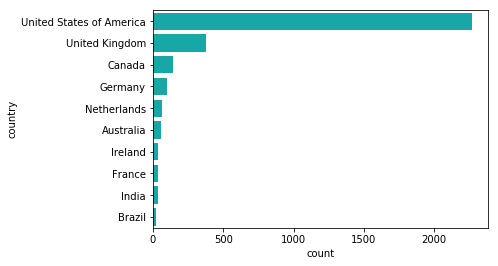

In [9]:
# Citation for concatenation of data: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# Citation for all seaborn plots: http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot
# Concatenate country variable in all datasets
countries_2014 = osmi_2014[["country"]]
countries_2016 = osmi_2016[["country"]]
countries_2017 = osmi_2017[["country"]]
countries_2018 = osmi_2018[["country"]]
countries_2019 = osmi_2019[["country"]]
frames = [countries_2014, countries_2016, countries_2017, countries_2018, countries_2019]
result = pd.concat(frames, ignore_index= True)
# Plot and get counts for top 10 countries
sns.countplot(y="country", data=result, color="c", order=result.country.value_counts().iloc[:10].index)
print(result.country.value_counts().iloc[:10])

**US-specific plots**

In [10]:
# Get only USA data and concatenate
usa_2014 = osmi_2014[osmi_2014["country"].values  == "United States of America"]
states_2014 = usa_2014[['state', 'year', 'age', 'age_range', 'gender', 'no_employees', 'family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview', 'treatment']].copy()
usa_2016 = osmi_2016[osmi_2016["country"].values  == "United States of America"]
states_2016 = usa_2016[['state', 'year', 'age', 'age_range', 'gender', 'no_employees', 'family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview', 'treatment']].copy()
usa_2017 = osmi_2017[osmi_2017["country"].values  == "United States of America"]
states_2017 = usa_2017[['state', 'year', 'age', 'age_range', 'gender', 'no_employees', 'family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview', 'treatment']].copy()
usa_2018 = osmi_2018[osmi_2018["country"].values  == "United States of America"]
states_2018 = usa_2018[['state', 'year', 'age', 'age_range', 'gender', 'no_employees', 'family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview', 'treatment']].copy()
usa_2019 = osmi_2019[osmi_2019["country"].values  == "United States of America"]
states_2019 = usa_2019[['state', 'year', 'age', 'age_range', 'gender', 'no_employees', 'family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview', 'treatment']].copy()
         
states = [states_2014, states_2016, states_2017, states_2018, states_2019]
usa_all = pd.concat(states, ignore_index= True)
usa_all
# Drop if state = N/A
idx_names = usa_all[usa_all['state'] == "N/A"].index 
usa_all.drop(idx_names, inplace = True)
# Dictionary of state abbrevs: https://gist.github.com/rugbyprof/76575b470b6772ce8fa0c49e23931d97
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
# Convert all state values to abbreviations
states = []
for r in usa_all["state"]:
    if r in us_state_abbrev:
        states.append(us_state_abbrev[r])
    else:
        states.append(r)
usa_all["abbrev"] = states
usa_all
# Get state frequencies
freq = pd.DataFrame({'freq' : usa_all.groupby("abbrev").size()}).reset_index()

In [11]:
# Citation for choropleth maps: https://plotly.com/python/choropleth-maps/
# Plot frequency of respondents in each state
fig = px.choropleth(freq, locations=freq['abbrev'], locationmode="USA-states", color = 'freq', scope="usa", color_continuous_scale=px.colors.sequential.Blues)
fig.show()

In [12]:
# Get count of treatment = 1 in each state
treatment_freq = pd.DataFrame({'freq' : usa_all.groupby(["abbrev", "treatment"]).size()}).reset_index()
treatment_freq1 = treatment_freq.loc[treatment_freq['treatment'] == 1]
treatment_freq1

abbrev  treatment  freq
1      AK          1     1
3      AL          1    10
5      AZ          1     9
7      CA          1   245
9      CO          1    32
11     CT          1     5
13     DC          1    11
14     DE          1     1
16     FL          1    26
18     GA          1    23
19     HI          1     1
21     IA          1    11
23     ID          1     5
25     IL          1   127
27     IN          1    44
29     KS          1     9
31     KY          1     7
33     LA          1     4
35     MA          1    43
37     MD          1    18
39     ME          1     4
41     MI          1    57
43     MN          1    57
45     MO          1    16
46     MS          1     1
48     MT          1     1
50     NC          1    34
52     ND          1     2
54     NE          1    30
56     NH          1     8
58     NJ          1    17
60     NM          1     2
62     NV          1     3
64     NY          1    85
66     OH          1    68
68     OK          1    10
70     OR          1    50
72     PA          1    54
74     RI          1     2
76     SC          1     5
78     SD          1     4
80     TN          1    55
82     TX          1    69
84     UT          1    17
86     VA          1    25
88     VT          1     2
90     WA          1   102
92     WI          1    27
95     WY          1     2

In [13]:
# Plot frequency of treatment = 1 in each state
fig1 = px.choropleth(treatment_freq1, locations=treatment_freq1['abbrev'], locationmode="USA-states", color = 'freq', scope="usa", color_continuous_scale=px.colors.sequential.Blues)
fig1.show()

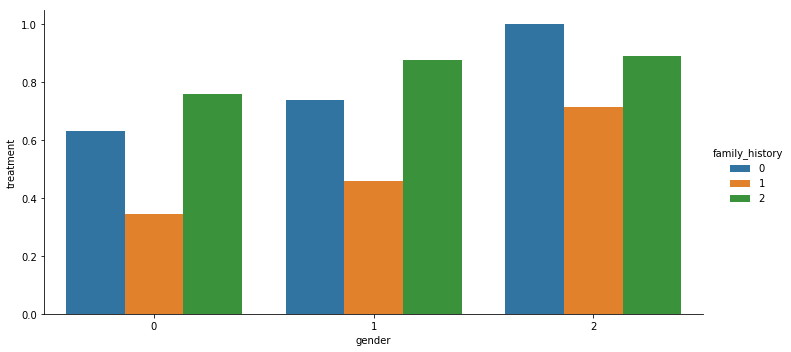

In [14]:
# for males and females, those with family histories were more likely to have mental illness, but for those who are non-binary 
# those who don't have a family history are more likely to have mental illness
g = sns.catplot(x="gender", y="treatment", hue= "family_history", data=usa_all, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)

**Merged all data**

In [15]:
# Concatenate all necessary fields for 2014, 2016-2019
merge_2014 = osmi_2014[['year', 'country_label','age', 'age_range', 'gender', 'no_employees', 'family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview', 'treatment']].copy()
merge_2016 = osmi_2016[['year', 'country_label','age', 'age_range', 'gender', 'no_employees', 'family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview', 'treatment']].copy()
merge_2017 = osmi_2017[['year', 'country_label','age', 'age_range', 'gender', 'no_employees','family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview', 'treatment']].copy()
merge_2018 = osmi_2018[['year', 'country_label','age', 'age_range', 'gender', 'no_employees','family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview', 'treatment']].copy()
merge_2019 = osmi_2019[['year', 'country_label','age', 'age_range', 'gender', 'no_employees','family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview', 'treatment']].copy()
         
merges = [merge_2014, merge_2016, merge_2017, merge_2018, merge_2019]
merged_all = pd.concat(merges, ignore_index= True)
merged_all.to_csv(r'C:\Users\joyce\OSMI\modified_merged_all.csv', index=False)
merged_all

year  country_label  age  age_range  gender  no_employees  \
0     2014              1   29          1       0             3   
1     2014              1   46          2       0             2   
2     2014              1   41          2       0             5   
3     2014              1   33          2       0             2   
4     2014              1   35          2       0             5   
5     2014              1   33          2       0             0   
6     2014              1   35          2       1             1   
7     2014              1   34          2       0             2   
8     2014              0   37          2       0             1   
9     2014              0   32          2       0             1   
10    2014              0   30          1       0             4   
11    2014              1   42          2       0             2   
12    2014              1   40          2       1             0   
13    2014              1   27          1       0             1   
14    2014              0   29          1       0             0   
15    2014              0   38          2       0             3   
16    2014              1   50          2       0             3   
17    2014              1   35          2       0             5   
18    2014              0   24          1       0             1   
19    2014              1   35          2       0             5   
20    2014              0   27          1       0             0   
21    2014              0   18          0       0             1   
22    2014              1   30          1       0             2   
23    2014              1   38          2       1             2   
24    2014              0   28          1       0             2   
25    2014              1   34          2       0             1   
26    2014              1   30          1       0             2   
27    2014              1   22          1       0             1   
28    2014              1   33          2       0             3   
29    2014              1   31          2       0             3   
...    ...            ...  ...        ...     ...           ...   
3413  2019              0   41          2       0             5   
3414  2019              0   41          2       0             0   
3415  2019              0   25          1       0             5   
3416  2019              0   27          1       2             1   
3417  2019              1   47          2       1             5   
3418  2019              1   24          1       0             2   
3419  2019              1   40          2       0             5   
3420  2019              1   37          2       0             3   
3421  2019              1   47          2       0             5   
3422  2019              1   30          1       1             5   
3423  2019              1   24          1       1             2   
3424  2019              1   38          2       1             5   
3425  2019              0   42          2       0             1   
3426  2019              0   39          2       0             3   
3427  2019              1   42          2       0             5   
3428  2019              1   47          2       0             5   
3429  2019              0   29          1       0             5   
3430  2019              1   55          2       0             5   
3431  2019              1   34          2       2             4   
3432  2019              0   45          2       0             5   
3433  2019              0   46          2       0             5   
3434  2019              0   23          1       1             5   
3435  2019              1   22          1       1             3   
3436  2019              0   30          1       0             2   
3437  2019              1   42          2       1             3   
3438  2019              0   26          1       1             2   
3439  2019              1   31          2       1             1   
3440  2019              0   27          1       0    

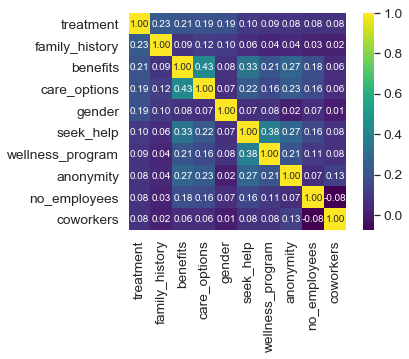

In [16]:
# Get correlations
merged_all_hmap = merged_all.drop(["country_label", "year"], axis = 1)
corr = merged_all_hmap.corr()

# Create treatment correlation matrix
k = 10 # num variables for heatmap
cols = corr.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(merged_all_hmap[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap = 'viridis',yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Compare non-USA and USA**

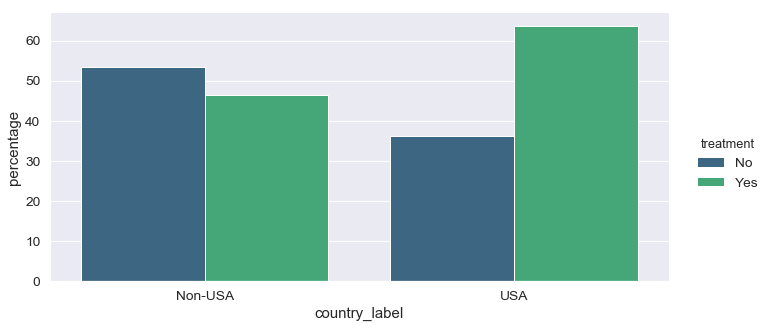

In [17]:
# Plot treatment distribution comparing USA and non-USA
o = dict_labs["country_label"]
treatment_country_counts = (merged_all.groupby(['country_label'])['treatment']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('treatment'))
p = sns.catplot(x="country_label", y="percentage", hue="treatment", data=treatment_country_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette = "viridis")
p.set_xticklabels(o)
new_labels = ["No", "Yes"]
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.87)

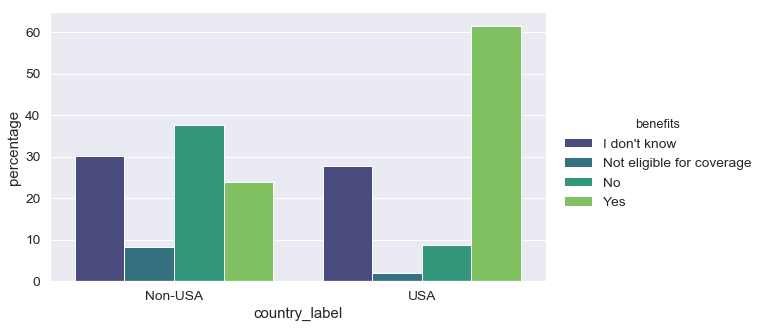

In [18]:
# Plot benefits distribution comparing USA and non-USA
o = dict_labs["country_label"]
benefits_country_counts = (merged_all.groupby(['country_label'])['benefits']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('benefits'))
p = sns.catplot(x="country_label", y="percentage", hue="benefits", data=benefits_country_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette = "viridis")
p.set_xticklabels(o)
new_labels = dict_labs['benefits']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.72)

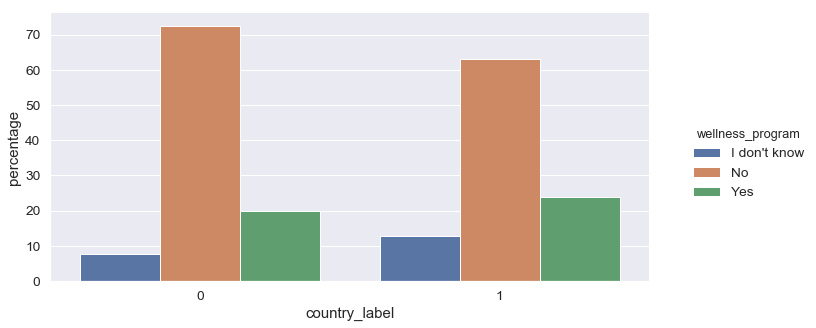

In [19]:
# Plot wellness distribution comparing USA and non-USA
wellness_country_counts = (merged_all.groupby(['country_label'])['wellness_program']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('wellness_program'))
p = sns.catplot(x="country_label", y="percentage", hue="wellness_program", data=wellness_country_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
new_labels = dict_labs["wellness_program"]
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.80)

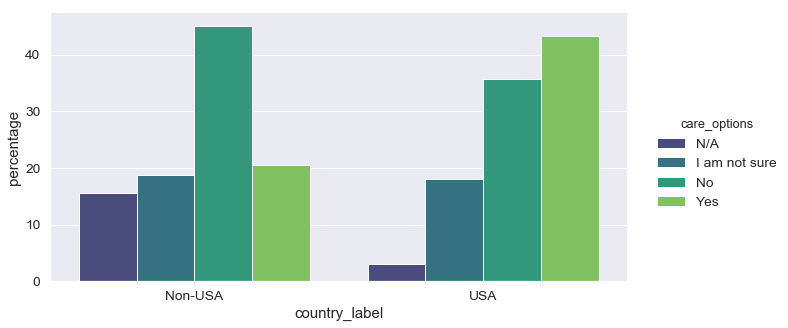

In [20]:
# Plot care_options distribution comparing USA and non-USA
o = dict_labs["country_label"]
care_country_counts = (merged_all.groupby(['country_label'])['care_options']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('care_options'))
p = sns.catplot(x="country_label", y="percentage", hue="care_options", data=care_country_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette = "viridis")
new_labels = dict_labs["care_options"]
p.set_xticklabels(o)
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.80)

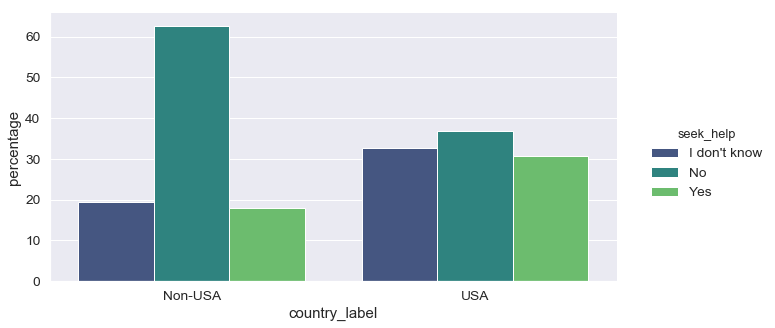

In [21]:
# Plot seek_help distribution comparing USA and non-USA
o = dict_labs["country_label"]
help_country_counts = (merged_all.groupby(['country_label'])['seek_help']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('seek_help'))
p = sns.catplot(x="country_label", y="percentage", hue="seek_help", data=help_country_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette = "viridis")
new_labels = dict_labs["seek_help"]
p.set_xticklabels(o)
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.80)

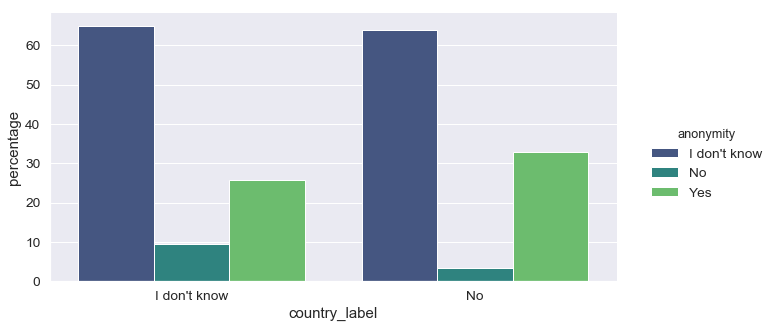

In [22]:
# Plot anonymity distribution comparing USA and non-USA
o = dict_labs["anonymity"]
anonymity_country_counts = (merged_all.groupby(['country_label'])['anonymity']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('anonymity'))
p = sns.catplot(x="country_label", y="percentage", hue="anonymity", data=anonymity_country_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette = "viridis")
new_labels = dict_labs["anonymity"]
p.set_xticklabels(o)
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.80)

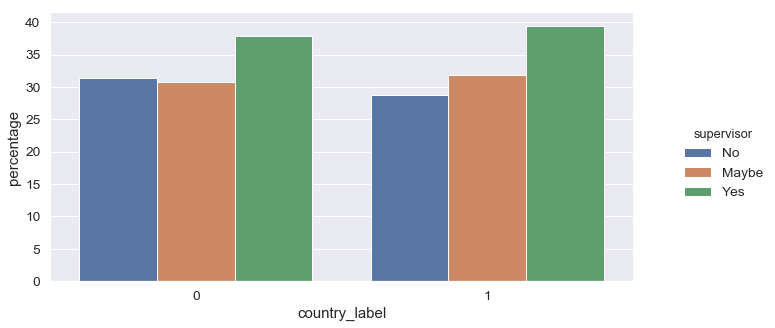

In [23]:
# Plot supervisor distribution comparing USA and non-USA
supervisor_country_counts = (merged_all.groupby(['country_label'])['supervisor']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('supervisor'))
p = sns.catplot(x="country_label", y="percentage", hue="supervisor", data=supervisor_country_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
new_labels = dict_labs['supervisor']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.82)

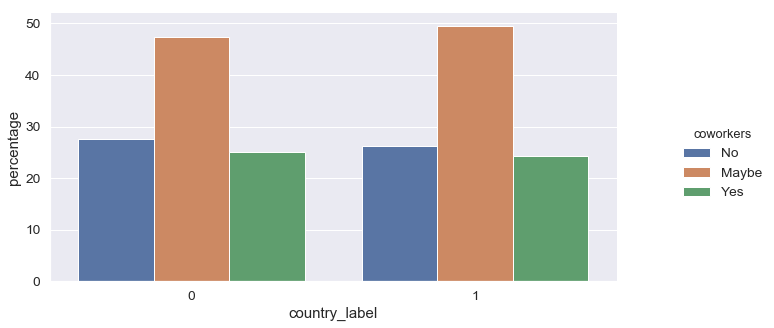

In [24]:
# Plot coworkers distribution comparing USA and non-USA
coworkers_country_counts = (merged_all.groupby(['country_label'])['coworkers']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('coworkers'))
p = sns.catplot(x="country_label", y="percentage", hue="coworkers", data=coworkers_country_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
new_labels = dict_labs['coworkers']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.80)

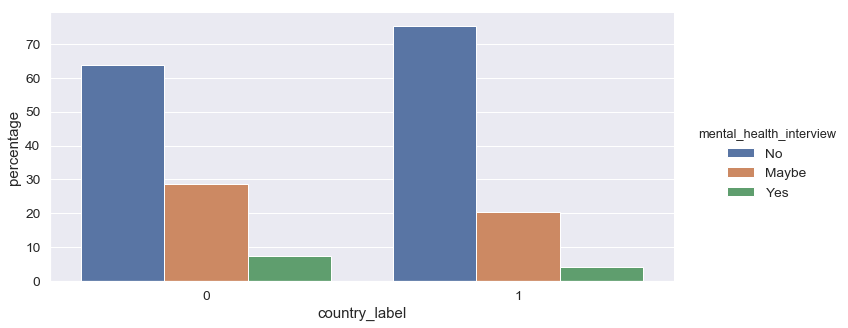

In [25]:
# Plot mental_health_interview distribution comparing USA and non-USA
mental_country_counts = (merged_all.groupby(['country_label'])['mental_health_interview']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('mental_health_interview'))
p = sns.catplot(x="country_label", y="percentage", hue="mental_health_interview", data=mental_country_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
new_labels = dict_labs["mental_health_interview"]
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.80)

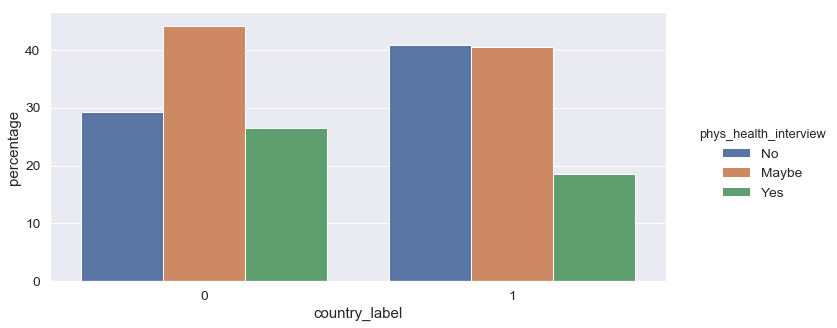

In [26]:
# Plot phys_health_interview distribution comparing USA and non-USA
phys_country_counts = (merged_all.groupby(['country_label'])['phys_health_interview']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('phys_health_interview'))
p = sns.catplot(x="country_label", y="percentage", hue="phys_health_interview", data=phys_country_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
new_labels = dict_labs["phys_health_interview"]
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.80)

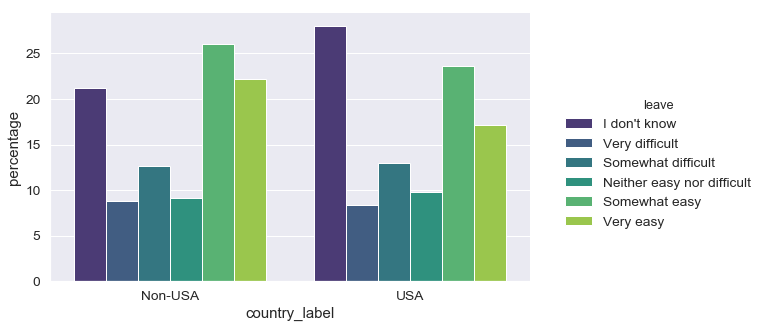

In [27]:
# Plot leave distribution comparing USA and non-USA
o = dict_labs["country_label"]
leave_country_counts = (merged_all.groupby(['country_label'])['leave']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('leave'))
p = sns.catplot(x="country_label", y="percentage", hue="leave", data=leave_country_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette = "viridis")
p.set_xticklabels(o)
new_labels = dict_labs["leave"]
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.70)

**Plots with all data**

Text(0.5, 0, 'age')

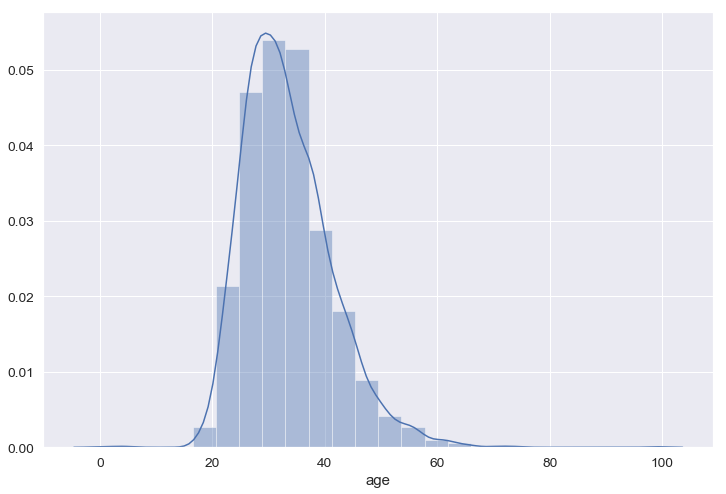

In [28]:
# Plot age distribution 
plt.figure(figsize=(12,8))
sns.distplot(merged_all["age"], bins=24)
plt.xlabel("age")

0    0.719721
1    0.249201
2    0.031078
Name: gender, dtype: float64


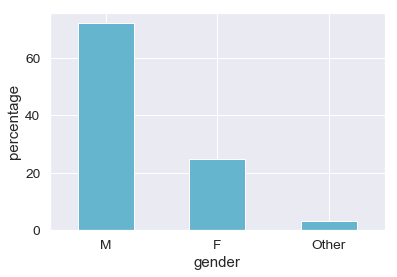

In [29]:
# Plot gender distribution 
x = merged_all.gender.value_counts(normalize=True).mul(100).plot(kind='bar',color="c")
o = dict_labs["gender"]
x.set_xticklabels(o, rotation=0)
plt.xlabel("gender")
plt.ylabel("percentage")
# Get percentages for gender distribution
print(merged_all.gender.value_counts(normalize=True))

1    0.578565
0    0.421435
Name: treatment, dtype: float64


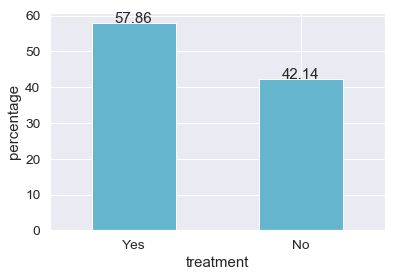

In [30]:
# Plot treatment distribution 
x = merged_all.treatment.value_counts(normalize=True).mul(100).plot(kind='bar',color="c")
o = ["Yes", "No"]
x.set_xticklabels(o, rotation=0)
plt.xlabel("treatment")
plt.ylabel("percentage")
for p in x.patches:
    x.annotate(str(round(p.get_height(),2)), (p.get_x() + p.get_width()/3.75, p.get_height() * 1.005))
print(merged_all.treatment.value_counts(normalize=True))

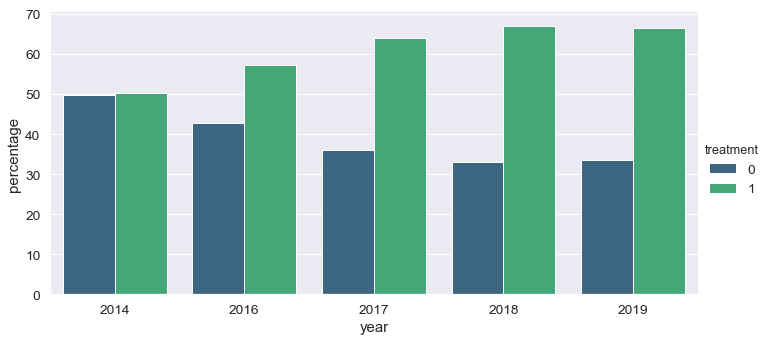

In [31]:
# Plot treatment distribution for each year
tre_counts = (merged_all.groupby(['year'])['treatment']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('treatment'))
p = sns.catplot(x="year", y="percentage", hue="treatment", data=tre_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette='viridis')
# new_labels = dict_labs['']
# for t, l in zip(p._legend.texts, new_labels): t.set_text(l)

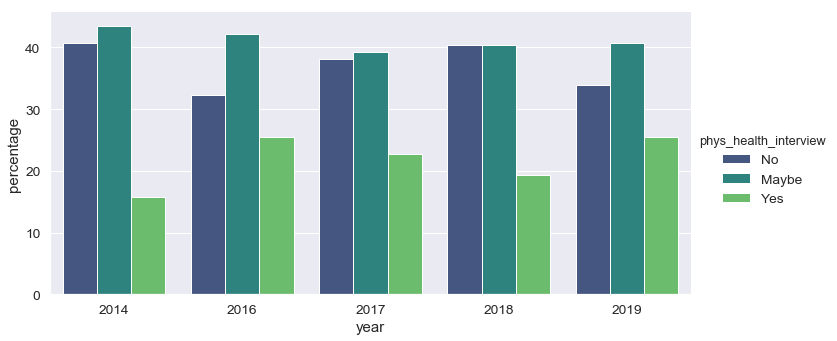

In [32]:
# Plot phys_health_interview distribution for each year
phys_interview_counts = (merged_all.groupby(['year'])['phys_health_interview']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('phys_health_interview'))
p = sns.catplot(x="year", y="percentage", hue="phys_health_interview", data=phys_interview_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette = 'viridis')
new_labels = dict_labs['phys_health_interview']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)

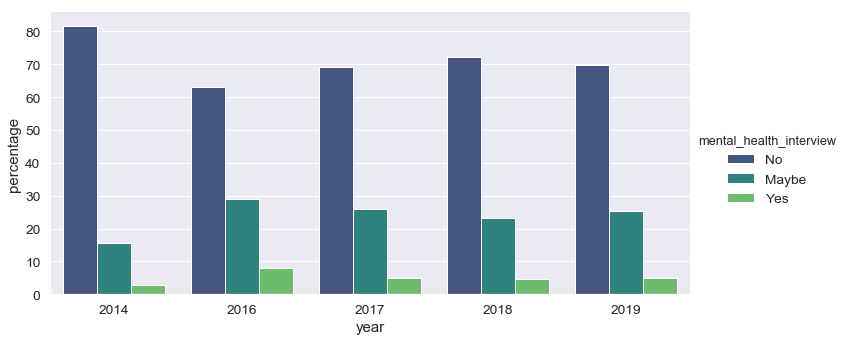

In [33]:
# Plot mental_health_interview distribution for each year
mental_interview_counts = (merged_all.groupby(['year'])['mental_health_interview']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('mental_health_interview'))
p = sns.catplot(x="year", y="percentage", hue="mental_health_interview", data=mental_interview_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette='viridis')
new_labels = dict_labs['mental_health_interview']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)

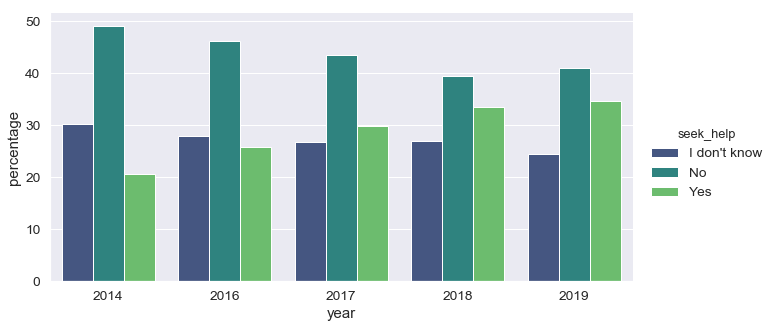

In [34]:
# Plot seek_help distribution for each year
seek_help_counts = (merged_all.groupby(['year'])['seek_help']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('seek_help'))
h = sns.catplot(x="year", y="percentage", hue="seek_help", data=seek_help_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette = "viridis")
new_labels = dict_labs['seek_help']
for t, l in zip(h._legend.texts, new_labels): t.set_text(l)
h.fig.subplots_adjust(top=0.9,right=0.82)

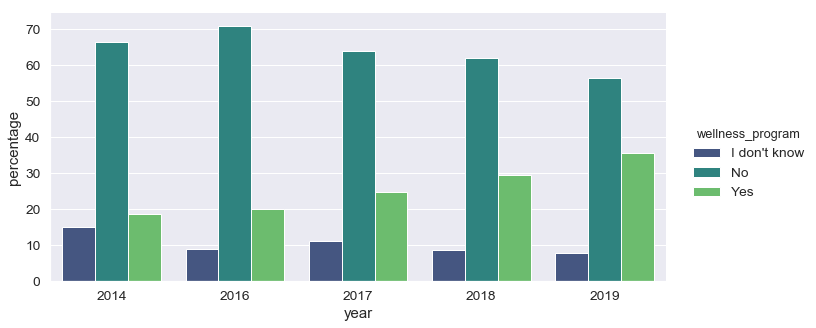

In [35]:
# Plot wellness_program distribution for each year
wellness_counts = (merged_all.groupby(['year'])['wellness_program']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('wellness_program'))
p = sns.catplot(x="year", y="percentage", hue="wellness_program", data=wellness_counts, kind="bar",  ci=None, height=5, aspect=2, palette = "viridis")
new_labels = dict_labs['wellness_program']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.82)

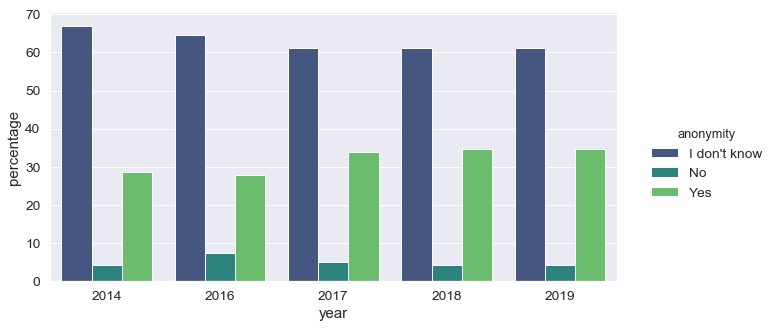

In [36]:
# Plot anonymity distribution for each year
anonymity_counts = (merged_all.groupby(['year'])['anonymity']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('anonymity'))
p = sns.catplot(x="year", y="percentage", hue="anonymity", data=anonymity_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette='viridis')
new_labels = dict_labs['anonymity']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.80)

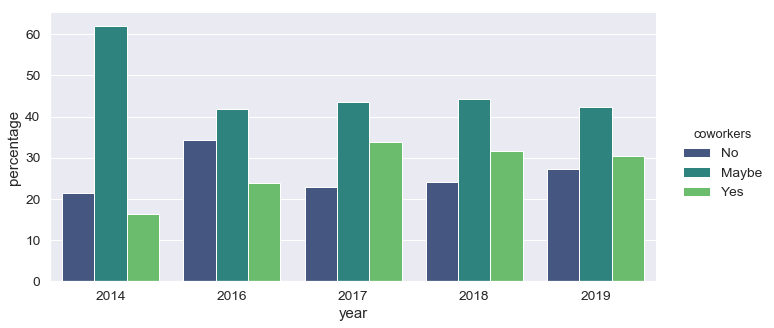

In [37]:
# Plot coworkers distribution for each year
coworkers_counts = (merged_all.groupby(['year'])['coworkers']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('coworkers'))
p = sns.catplot(x="year", y="percentage", hue="coworkers", data=coworkers_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette='viridis')
new_labels = dict_labs['coworkers']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.85)

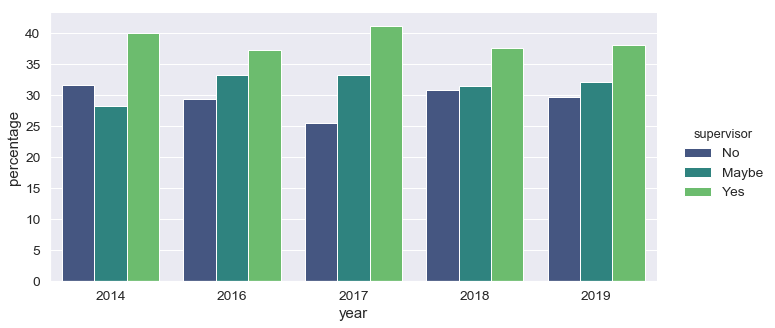

In [38]:
# Plot supervisor distribution for each year
supervisor_counts = (merged_all.groupby(['year'])['supervisor']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('supervisor'))
p = sns.catplot(x="year", y="percentage", hue="supervisor", data=supervisor_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette='viridis')
new_labels = dict_labs['supervisor']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.85)

**Plots with 2016-2019**

In [39]:
# Concatenate necessary 2016-2019 data
part_2016 = osmi_2016[['year','country_label', 'age', 'age_range', 'gender', 'no_employees', 'family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview','work_interfere_effective','work_interfere_ineffective',
                       'current_mental_disorder', 'diagnosed','treatment']].copy()
part_2017 = osmi_2017[['year', 'country_label','age', 'age_range', 'gender', 'no_employees', 'family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview','work_interfere_effective','work_interfere_ineffective',
                       'current_mental_disorder', 'diagnosed','treatment']].copy()
part_2018 = osmi_2018[['year', 'country_label','age', 'age_range', 'gender', 'no_employees', 'family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview','work_interfere_effective','work_interfere_ineffective',
                       'current_mental_disorder', 'diagnosed','treatment']].copy()
part_2019 = osmi_2019[['year', 'country_label','age', 'age_range', 'gender', 'no_employees', 'family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview','work_interfere_effective','work_interfere_ineffective',
                       'current_mental_disorder', 'diagnosed','treatment']].copy()

parts = [part_2016, part_2017, part_2018, part_2019]
merged_no2014 = pd.concat(parts, ignore_index= True)
merged_no2014.to_csv(r'C:\Users\joyce\OSMI\modified_merged_no2014.csv', index=False)
merged_no2014

year  country_label  age  age_range  gender  no_employees  \
0     2016              0   39          2       0             2   
1     2016              1   29          1       0             1   
2     2016              0   38          2       0             1   
3     2016              1   43          2       1             1   
4     2016              0   42          2       0             5   
5     2016              1   30          1       0             2   
6     2016              1   37          2       1             5   
7     2016              1   44          2       1             2   
8     2016              1   28          1       0             2   
9     2016              1   34          2       0             3   
10    2016              1   30          1       1             3   
11    2016              0   44          2       0             3   
12    2016              1   35          2       0             3   
13    2016              1   52          2       0             3   
14    2016              0   32          2       1             2   
15    2016              0   34          2       0             4   
16    2016              1   31          2       0             3   
17    2016              1   26          1       0             1   
18    2016              1   35          2       0             5   
19    2016              0   25          1       0             2   
20    2016              0   33          2       0             0   
21    2016              0   42          2       0             3   
22    2016              0   27          1       0             2   
23    2016              0   35          2       0             3   
24    2016              0   34          2       1             4   
25    2016              0   32          2       2             1   
26    2016              0   32          2       2             3   
27    2016              1   30          1       0             3   
28    2016              1   31          2       0             5   
29    2016              0   36          2       0             2   
...    ...            ...  ...        ...     ...           ...   
2319  2019              0   41          2       0             5   
2320  2019              0   41          2       0             0   
2321  2019              0   25          1       0             5   
2322  2019              0   27          1       2             1   
2323  2019              1   47          2       1             5   
2324  2019              1   24          1       0             2   
2325  2019              1   40          2       0             5   
2326  2019              1   37          2       0             3   
2327  2019              1   47          2       0             5   
2328  2019              1   30          1       1             5   
2329  2019              1   24          1       1             2   
2330  2019              1   38          2       1             5   
2331  2019              0   42          2       0             1   
2332  2019              0   39          2       0             3   
2333  2019              1   42          2       0             5   
2334  2019              1   47          2       0             5   
2335  2019              0   29          1       0             5   
2336  2019              1   55          2       0             5   
2337  2019              1   34          2       2             4   
2338  2019              0   45          2       0             5   
2339  2019              0   46          2       0             5   
2340  2019              0   23          1       1             5   
2341  2019              1   22          1       1             3   
2342  2019              0   30          1       0             2   
2343  2019              1   42          2       1             3   
2344  2019              0   26          1       1             2   
2345  2019              1   31          2       1             1   
2346  2019              0   27          1       0    

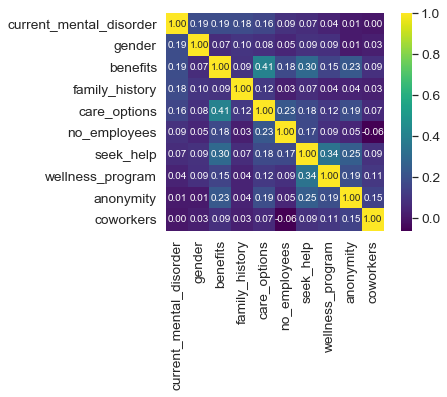

In [40]:
# Get correlations
merged_no2014_hmap = merged_no2014.drop(["treatment", "work_interfere_effective", "work_interfere_ineffective", "diagnosed", 'country_label', 'year'], axis = 1)
corrs = merged_no2014_hmap.corr()

# Create current_mental_disorder correlation matrix
k = 10 # num variables for heatmap
cols = corrs.nlargest(k, 'current_mental_disorder')['current_mental_disorder'].index
cm = np.corrcoef(merged_no2014_hmap[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap = 'viridis',yticklabels=cols.values, xticklabels=cols.values)
plt.show()

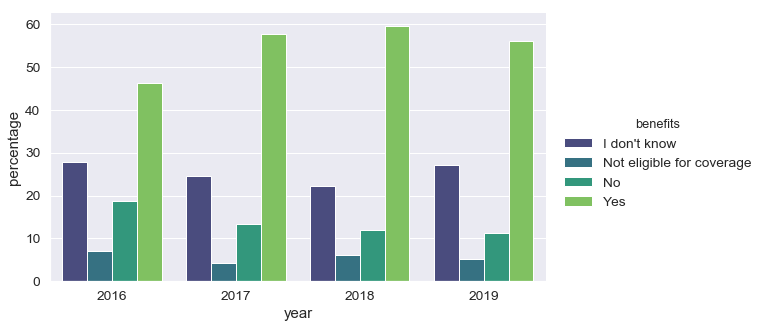

In [41]:
# Plot benefits distribution for each year
benefits_counts = (merged_no2014.groupby(['year'])['benefits']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('benefits'))
p = sns.catplot(x="year", y="percentage", hue="benefits", data=benefits_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True,palette= 'viridis')
new_labels = dict_labs['benefits']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.72)

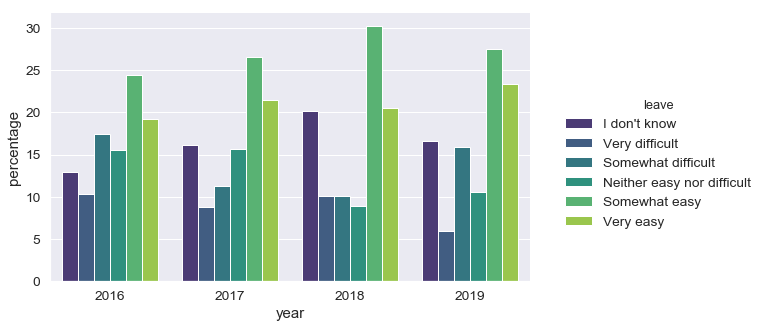

In [42]:
# Plot leave distribution for each year
leave_counts = (merged_no2014.groupby(['year'])['leave']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('leave'))
p = sns.catplot(x="year", y="percentage", hue="leave", data=leave_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette = "viridis")
new_labels = dict_labs['leave']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.7)

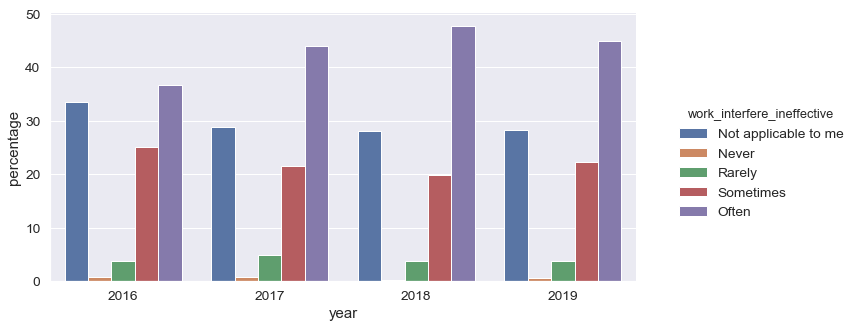

In [43]:
# Plot work_interfere_ineffective distribution for each year
interfere_counts = (merged_no2014.groupby(['year'])['work_interfere_ineffective']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('work_interfere_ineffective'))
p = sns.catplot(x="year", y="percentage", hue="work_interfere_ineffective", data=interfere_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
new_labels = dict_labs['work_interfere_ineffective']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.75)

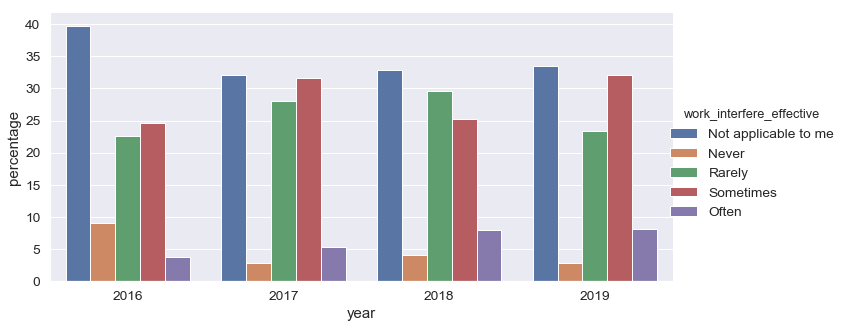

In [44]:
# Plot work_interfere_effective distribution for each year
eff_interfere_counts = (merged_no2014.groupby(['year'])['work_interfere_effective']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('work_interfere_effective'))
p = sns.catplot(x="year", y="percentage", hue="work_interfere_effective", data=eff_interfere_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
new_labels = dict_labs['work_interfere_effective']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)
p.fig.subplots_adjust(top=0.9,right=0.8)

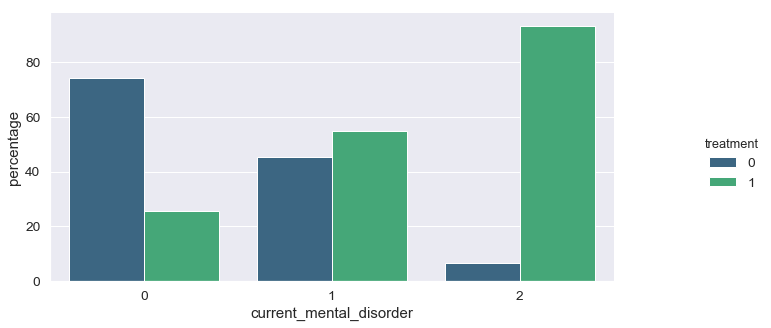

In [45]:
# Plot percentage treated given that they have a current mental disorder
treatment_counts = (merged_no2014.groupby(['current_mental_disorder'])['treatment']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('treatment'))
p = sns.catplot(x="current_mental_disorder", y="percentage", hue="treatment", data=treatment_counts, palette = "viridis", kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
p.fig.subplots_adjust(top=0.9,right=0.8)

In [46]:
# Get exact percentages
print(treatment_counts)

   current_mental_disorder  treatment  percentage
0                        0          0   74.261084
3                        1          0   45.348837
5                        2          0    6.758080
1                        0          1   25.738916
2                        1          1   54.651163
4                        2          1   93.241920


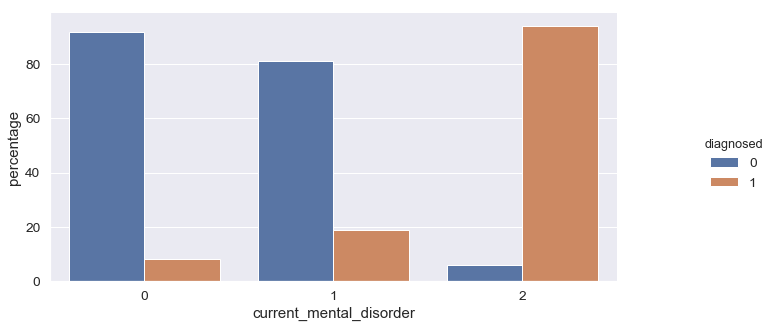

In [47]:
# Plot percentage diagnosed given that they have a current mental disorder
diagnosed_counts = (merged_no2014.groupby(['current_mental_disorder'])['diagnosed']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('diagnosed'))
p = sns.catplot(x="current_mental_disorder", y="percentage", hue="diagnosed", data=diagnosed_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
p.fig.subplots_adjust(top=0.9,right=0.8)

In [48]:
# Get exact percentages
print(diagnosed_counts)

   current_mental_disorder  diagnosed  percentage
0                        0          0   91.748768
2                        1          0   81.007752
5                        2          0    5.974535
1                        0          1    8.251232
3                        1          1   18.992248
4                        2          1   94.025465


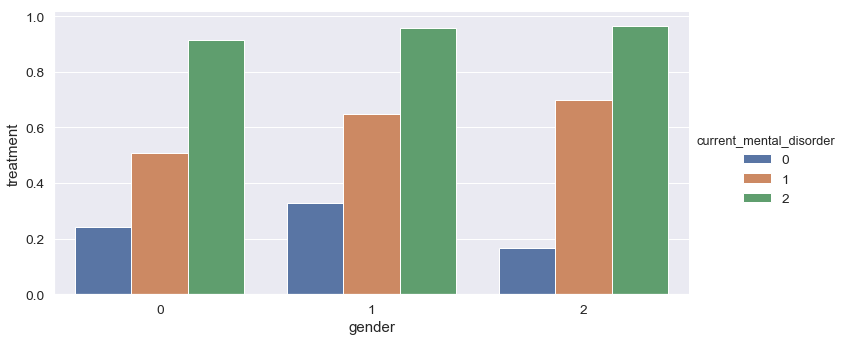

In [49]:
# Plot current_mental_disorder given a specific gender category
g = sns.catplot(x="gender", y="treatment", hue="current_mental_disorder", data=merged_no2014, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)

In [50]:
# Get exact percentages for treatment and current_mental_disorder
print(merged_all.treatment.value_counts(normalize=True))
print(merged_no2014.current_mental_disorder.value_counts(normalize=True))

1    0.578565
0    0.421435
Name: treatment, dtype: float64
2    0.434653
0    0.345679
1    0.219668
Name: current_mental_disorder, dtype: float64


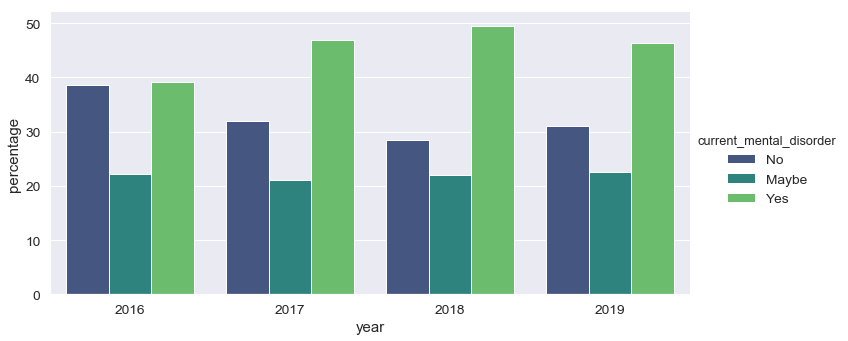

In [51]:
# Plot current_mental_disorder distribution for each year
cur_counts = (merged_no2014.groupby(['year'])['current_mental_disorder']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('current_mental_disorder'))
p = sns.catplot(x="year", y="percentage", hue="current_mental_disorder", data=cur_counts, kind="bar",  ci=None, height=5, aspect=2, legend_out = True, palette='viridis')
new_labels = dict_labs['current_mental_disorder']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l)

**Plots with 2017-2019**

In [52]:
# Concatenate necessary 2017-2019 data
set_2017 = osmi_2017[['year', 'age', 'age_range', 'gender', 'no_employees', 'family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview','importance_physical', 
                        'importance_mental', 'id_mental_health_issue', 'overall_support_rating', 'work_interfere_effective','work_interfere_ineffective',
                       'current_mental_disorder', 'diagnosed','treatment']].copy()
set_2018 = osmi_2018[['year', 'age', 'age_range', 'gender', 'no_employees', 'family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview','importance_physical', 
                        'importance_mental', 'id_mental_health_issue', 'overall_support_rating', 'work_interfere_effective','work_interfere_ineffective',
                       'current_mental_disorder', 'diagnosed','treatment']].copy()
set_2019 = osmi_2019[['year', 'age', 'age_range', 'gender', 'no_employees', 'family_history', 'benefits', 
                        'care_options','wellness_program', 'seek_help', 'anonymity', 'supervisor', 'leave',
                        'coworkers', 'mental_health_interview','phys_health_interview','importance_physical', 
                        'importance_mental', 'id_mental_health_issue', 'overall_support_rating', 'work_interfere_effective','work_interfere_ineffective',
                       'current_mental_disorder', 'diagnosed','treatment']].copy()

sets = [set_2017, set_2018, set_2019]
merged_no2014_2016 = pd.concat(sets, ignore_index= True)
merged_no2014_2016.to_csv(r'C:\Users\joyce\OSMI\modified_merged_no2014_2016.csv', index=False)
merged_no2014_2016

year  age  age_range  gender  no_employees  family_history  benefits  \
0     2017   27          1       1             3               1         2   
1     2017   31          2       0             3               1         3   
2     2017   36          2       0             1               2         0   
3     2017   22          1       0             5               0         3   
4     2017   30          1       0             3               2         3   
5     2017   36          2       1             1               2         3   
6     2017   38          2       1             2               2         3   
7     2017   40          2       0             3               2         3   
8     2017   35          2       0             3               2         0   
9     2017   23          1       0             5               1         2   
10    2017   22          1       1             5               0         0   
11    2017   34          2       1             2               2         0   
12    2017   28          1       0             3               1         3   
13    2017   38          2       0             2               1         2   
14    2017   21          1       0             1               1         0   
15    2017   22          1       0             1               2         2   
16    2017   18          0       0             3               2         1   
17    2017   37          2       1             2               2         0   
18    2017   25          1       0             0               0         2   
19    2017   66          3       1             5               2         3   
20    2017   31          2       1             3               2         3   
21    2017   32          2       0             3               2         3   
22    2017   30          1       1             3               2         3   
23    2017   31          2       0             3               0         3   
24    2017   46          2       0             3               2         1   
25    2017   28          1       1             5               2         1   
26    2017   34          2       1             1               0         2   
27    2017   25          1       0             2               0         3   
28    2017   35          2       0             3               0         3   
29    2017   40          2       0             3               1         3   
...    ...  ...        ...     ...           ...             ...       ...   
1177  2019   41          2       0             5               1         0   
1178  2019   41          2       0             0               1         3   
1179  2019   25          1       0             5               2         3   
1180  2019   27          1       2             1               2         2   
1181  2019   47          2       1             5               0         0   
1182  2019   24          1       0             2               0         3   
1183  2019   40          2       0             5               1         3   
1184  2019   37          2       0             3               0         3   
1185  2019   47          2       0             5               1         0   
1186  2019   30          1       1             5               2         3   
1187  2019   24          1       1             2               2         1   
1188  2019   38          2       1             5               2         3   
1189  2019   42          2       0             1               2         3   
1190  2019   39          2       0             3               1         2   
1191  2019   42          2       0             5               0         0   
1192  2019   47          2       0             5               2         3   
1193  2019   29          1       0             5               1         3   
1194  2019   55          2       0             5               2         3   
1195  2019   34          2       2             4               2         0   
1196  2019   45          2  

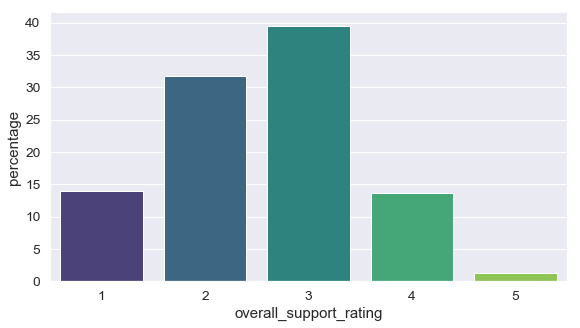

In [53]:
# Plot overall_support_rating distribution for 2017-2019
support_counts = (merged_no2014_2016.groupby(['year'])['overall_support_rating']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('overall_support_rating'))
p = sns.catplot(x="overall_support_rating", y="percentage", data=support_counts, kind="bar",  palette = 'viridis',ci=None, height=5, aspect=2, legend_out = True)
p.fig.subplots_adjust(top=0.9,right=0.8)

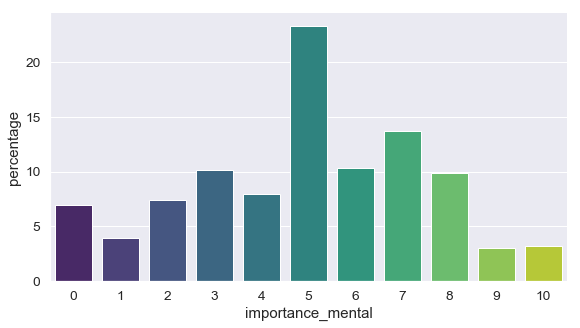

In [54]:
# Plot overall distribution for importance_mental for 2017-2019
importance_mental_counts = (merged_no2014_2016.groupby(['year'])['importance_mental']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('importance_mental'))
p = sns.catplot(x="importance_mental", y="percentage", data=importance_mental_counts, kind="bar",  palette = 'viridis',ci=None, height=5, aspect=2, legend_out = True)
o = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
p.set_xticklabels(o, rotation=0)
p.fig.subplots_adjust(top=0.9,right=0.8)

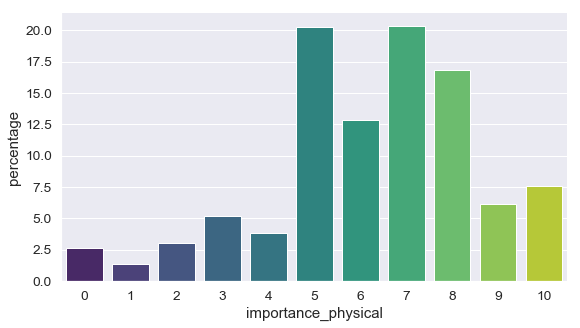

In [55]:
# Plot overall distribution for importance_physical for 2017-2019
importance_physical_counts = (merged_no2014_2016.groupby(['year'])['importance_physical']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('importance_physical'))
p = sns.catplot(x="importance_physical", y="percentage", data=importance_physical_counts, kind="bar",  palette = 'viridis',ci=None, height=5, aspect=2, legend_out = True)
o = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
p.set_xticklabels(o, rotation=0)
p.fig.subplots_adjust(top=0.9,right=0.8)